<a href="https://colab.research.google.com/github/BishoyAbd/CV-projec-v1_1/blob/master/Cv_project_v1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install facenet-pytorch
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 9.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:

#Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')
!ls "drive/My Drive/cv project files/"

Mounted at /content/drive
emos2.mp4  emos.mp4  EMOTION_DETECTOR_1.pt


In [4]:
#download video from drive
!gdown --id 1RzZ9k_aYPYsY6kn0EB7luGuUliGnaJyL

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1RzZ9k_aYPYsY6kn0EB7luGuUliGnaJyL
To: /content/videoplayback.mp4
100% 429M/429M [00:04<00:00, 98.4MB/s]


In [57]:
from facenet_pytorch import MTCNN
import os
from PIL import Image
import torch as pt
from torchvision import transforms as trans
from torch import nn
from imutils.video import FileVideoStream
import cv2
import time
import glob
device= 'cuda' if pt.cuda.is_available() else 'cpu'
# print(device)
import numpy as np
from matplotlib import pyplot as plt
import math
import seaborn as sns
from scipy import stats

In [22]:
VID_PATH="/content/videoplayback.mp4"
#initialize the model, selecting GPU as device and keeping all faces
mtcnn = MTCNN(select_largest=False, image_size=48, device='cuda', keep_all=False,post_process=False)

#Load the video
v_cap = cv2.VideoCapture(VID_PATH)
v_len = int(v_cap.get(cv2.CAP_PROP_FRAME_COUNT))
fps = int(v_cap.get(cv2.CAP_PROP_FPS))
timestamps = [] #list for the timestamps

# Loop through video
batch_size = 256
batch_num = 0
frames = []
boxes = []
landmarks = []
view_frames = []
view_boxes = []
view_landmarks = []
sf = 1 # get one frame per second

for i in range(v_len):
    # Load frame
    success, frame = v_cap.read()
    #select every n frames
    if i % math.floor(fps)*sf == 0: #skip to get every sf seconds
        success, frame = v_cap.retrieve()
    else:
        continue
    if not success:
        print("ERROR")
        continue

    # Add to batch, resizing for speed
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = Image.fromarray(frame)
    frame = frame.resize([int(f * 0.25) for f in frame.size])
    frames.append(frame)
    timestamps.append(math.floor(v_cap.get(cv2.CAP_PROP_POS_MSEC))//1000) #append timestamp of the frame
    # print(math.floor(v_cap.get(cv2.CAP_PROP_POS_MSEC))*1000)
    
    # When batch is full, detect faces and reset batch list
    if len(frames) >= batch_size:
        #print("Executed MTCNN batch num" + str(batch_num))
        #define save path 
        save_paths = [f'drive/My Drive/cv project files/faces/{timestamps[i]}.jpg' for i in range(len(frames))]
        #save all faces to files
        mtcnn(frames, save_path=save_paths)
        #increase batch number
        batch_num += 1
        frames = [] #clear frame list
        timestamps = [] #clear timestamplist


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
/usr/local/lib/python3.7/dist-packages/facenet_pytorch/models/utils/detect_face.py:183: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  batch_boxes, batch_points = np.array(batch_boxes), np.array(batch_points)
/usr/local/lib/python3.7/dist-packages/facenet_pytorch/models/mtcnn.py:339: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If yo

In [44]:
time_stamps=[]
filelist = glob.glob('drive/My Drive/cv project files/faces/*')
for f in filelist:
  time_stamp=int(os.path.split(f)[1].split('.')[0])
  time_stamps.append(time_stamp)
np_time_stamps=np.array(time_stamps)

np_images=np.array([Image.open(f) for f in filelist])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The input object of type 'JpegImageFile' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'JpegImageFile', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [ ]:
# frame=cv2.imread("drive/My Drive/cv project files/sf.")
# frame = Image.fromarray(frame)
# frame = frame.resize([int(f * 0.25) for f in frame.size])
# faces=mtcnn(frame)

# type(faces)
# # fig, axes = plt.subplots(1, len(faces))
# # for face, ax in zip(faces, axes):
# #     ax.imshow(face.permute(1, 2, 0).int().numpy())
# #     ax.axis('off')
# # fig.show()

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


torch.Tensor

In [28]:
class EmotionDetector(nn.Module):
  def __init__(self, in_ch,classes):
    super(EmotionDetector,self).__init__()

    self.conv1=nn.Conv2d(in_channels=in_ch,out_channels=60, kernel_size=(3,3))
    self.relu1=nn.ReLU()
    self.bn1=nn.BatchNorm2d(60)
    self.maxPool1=nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))


    self.conv2=nn.Conv2d(in_channels=60,out_channels=120, kernel_size=(3,3))
    self.relu2=nn.ReLU()
    self.bn2=nn.BatchNorm2d(120)
    self.maxPool2=nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))


    self.conv3=nn.Conv2d(in_channels=120,out_channels=240, kernel_size=(3,3))
    self.relu3=nn.ReLU()
    self.bn3=nn.BatchNorm2d(240)
    # self.maxPool3=nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))
    #28*28*1 -> 27-13-> 12-6 *80 -> 5*4*100
    #    
    self.dropout=nn.Dropout2d()

    self.conv4=nn.Conv2d(in_channels=240,out_channels=480, kernel_size=(3,3))
    self.relu4=nn.ReLU()
    self.maxPool4=nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))



    # self.conv5=nn.Conv2d(in_channels=120,out_channels=150, kernel_size=(5,5))
    # self.relu5=nn.ReLU()
    # self.maxPool5=nn.MaxPool2d(kernel_size=(2,2), stride=(1,1))


    self.fc1=nn.Linear(in_features=480*3*3,out_features=200)
    self.relu_fc1=nn.ReLU()

    self.fc2=nn.Linear(in_features=200,out_features=classes)
    self.lsm=nn.LogSoftmax(dim=1)

  def forward(self,x):
    debug=False
    x=x.float()
    if debug : print("input to cv1 ",x.shape)
    x=self.conv1(x)
    if debug : print("input to mxp1",x.shape)
    x=self.bn1(x)
    x=self.relu1(x)
    x=self.maxPool1(x)
    # x=self.dropout(x)


    if debug :print("input to cv2",x.shape)
    x=self.conv2(x)
    x=self.bn2(x)

    if debug : print("input to mxp2",x.shape)
    x=self.relu2(x)
    x=self.maxPool2(x)
    # x=self.dropout(x)

    if debug : print("input to cv3",x.shape)
    x=self.conv3(x)
    x=self.bn3(x)
    x=self.relu3(x)
    if debug : print("input to mxp3",x.shape)
    # x=self.maxPool3(x)
    x=self.dropout(x)

    
    x=self.conv4(x)
    x=self.relu4(x)
    x=self.maxPool4(x)
    x=self.dropout(x)
    # x=self.conv5(x)
    # x=self.relu5(x)
    # x=self.maxPool5(x)

    if debug : print("input to fc1",x.shape)
    x = pt.flatten(x,1)
    
    x=self.fc1(x)
    x=self.relu_fc1(x)
    if debug : print("input to fc2 ",x.shape)
    x=self.fc2(x)
    if debug : print("input to lsm ",x.shape)
    output=self.lsm(x)
    if debug : print("final output ",x.shape)
    return output


In [29]:
MODEL_NAME= 'EMOTION_DETECTOR_1.pt'
MODEL_PATH = f"drive/My Drive/cv project files//{MODEL_NAME}" 
CLASSES=3
model=EmotionDetector(in_ch=1,classes=CLASSES).to(device)
model.load_state_dict(pt.load(MODEL_PATH))

<All keys matched successfully>

In [78]:
print(len(np_images))
output_emo=[]
model.eval()
with pt.no_grad():
  for image, time in zip(np_images,np_time_stamps):
      image2 = Image.fromarray(np.uint8(image)).convert('L')
      img = trans.ToTensor()(image2).type(pt.FloatTensor).to("cuda").reshape(1,1,48,48)
      pred=pt.exp(model(img))
      idx=pred.argmax(axis=1).cpu().numpy()[0]
      output_emo.append(idx)

9283


In [82]:
print(output_emo[1:50])
print(time_stamps[1:50])
np_emo=np.array(output_emo)
np_ts=np.array(time_stamps)

[0, 0, 1, 1, 0, 2, 2, 2, 0, 0, 0, 1, 2, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2]
[2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]


In [83]:
i =0
#every 1 min get mode
step =60
#new time stamps every element represent a minute
ticks=[]
emotion_min=[]
min=0
while i +step < len(np_emo):
  #dont panic, jsut calculating the mode,
  #returns a tuple of lists get first e from tuple then first from list
  emotion_min.append(stats.mode(np_emo[i:i+step])[0][0])
  ticks.append(min)
  min+=1
  i=i+step


In [84]:
import pandas as pd
df=pd.DataFrame()
df['emotion']=emotion_min
df['time_Stamps']=ticks
df.head()

,emotion,time_Stamps
0,2,0
1,2,1
2,2,2
3,2,3
4,2,4


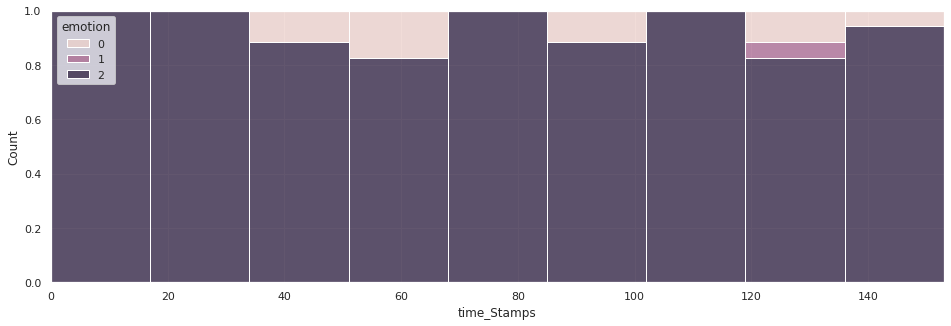

In [85]:
sns.set(rc={'figure.figsize':(16,5)})
sns.histplot(data=df, x='time_Stamps', hue='emotion', multiple='fill')